잡케어추천알고리즘경진대회
--

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
train=pd.read_csv("C:/Users/bella/Desktop/SelfStudy/데이콘/Jobcare_data/train.csv", parse_dates=["contents_open_dt"])
test=pd.read_csv("C:/Users/bella/Desktop/SelfStudy/데이콘/Jobcare_data/test.csv", parse_dates=["contents_open_dt"])
d_code=pd.read_csv("C:/Users/bella/Desktop/SelfStudy/데이콘/Jobcare_data/속성_D_코드.csv", index_col=0).T.to_dict()
h_code=pd.read_csv("C:/Users/bella/Desktop/SelfStudy/데이콘/Jobcare_data/속성_H_코드.csv", index_col=0).T.to_dict()
l_code=pd.read_csv("C:/Users/bella/Desktop/SelfStudy/데이콘/Jobcare_data/속성_L_코드.csv" ,index_col=0).T.to_dict()

In [4]:
#n : 세분류, s: 소분류, m: 중분류, l: 대분류
def add_code(df, d_code, h_code, l_code):
    df['person_prefer_d_1_n']= df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s']= df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l']= df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])
    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])
    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])
    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드']) 
    return df

train = add_code(train, d_code, h_code, l_code)
test= add_code(test, d_code, h_code, l_code)

- 참고한 링크: https://dacon.io/competitions/official/235863/codeshare/3877?page=1&dtype=recent

In [5]:
for i in range(1,7):
    name=train.columns[i]
    train[name]=train[name].apply(lambda x:1 if x==True else 2)
    
for i in range(1,7):
    name=test.columns[i]
    test[name]=test[name].apply(lambda x:1 if x==True else 2)

In [6]:
train["date"]=train["contents_open_dt"].dt.strftime("%d")
train["hour"]=train["contents_open_dt"].dt.strftime("%H")
train["day"]=train["contents_open_dt"].dt.strftime("%A")

train["date"]=train["date"].astype(int)
train["hour"]=train["hour"].astype(int)

In [7]:
test["date"]=test["contents_open_dt"].dt.strftime("%d")
test["hour"]=test["contents_open_dt"].dt.strftime("%H")
test["day"]=test["contents_open_dt"].dt.strftime("%A")

test["date"]=test["date"].astype(int)
test["hour"]=test["hour"].astype(int)

In [8]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

train["day"]=le.fit_transform(train['day'])
test["day"]=le.fit_transform(test['day'])

- month의 경우 train 1~11월, test의 경우 12월 이며, 년도는 2020년으로 동일함.
- 따라서, 칼럼을 추가하지 않음.

In [9]:
train.drop("contents_open_dt", axis=1, inplace=True)
test.drop("contents_open_dt", axis=1, inplace=True)

In [10]:
train.drop(['person_prefer_f','person_prefer_g'], axis=1, inplace=True)
test.drop(['person_prefer_f','person_prefer_g'], axis=1, inplace=True)

Person ML
--

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [12]:
df_unique=pd.DataFrame(columns=['col_name','len_unique','mix','max','mean','std'])

for i in range(len(train.columns)):
    col=train.columns[i]
    len_unique=len(train[col].unique())
    min_col=train[col].min()
    max_col=train[col].max()
    mean_col=train[col].mean()
    std_col=train[col].std()
    df_unique=df_unique.append({'col_name':col,'len_unique':len_unique,'mix':min_col,'max':max_col,'mean':mean_col,'std':std_col}, ignore_index=True)

df_unique=df_unique.sort_values("len_unique", ascending=False)
df_unique=df_unique.loc[df_unique['col_name']!='id']
df_unique=df_unique.reset_index()
df_unique.drop("index", axis=1, inplace=True)

In [13]:
df_unique.loc[df_unique['len_unique']>=36]

,col_name,len_unique,mix,max,mean,std
0,person_rn,300177,7,1049005,514111.533634,294354.743165
1,contents_rn,283359,20,753628,337674.345074,219518.485557
2,contents_attribute_l,1752,1,2013,1030.863194,527.235733
3,person_prefer_d_1,1093,4,1258,537.296399,411.441926
4,person_prefer_d_2,1081,4,1258,545.833926,403.328742
5,contents_attribute_d,1065,4,1258,581.505215,413.915756
6,person_prefer_d_3,1043,4,1258,534.994095,415.752072
7,person_prefer_d_1_n,443,4,1258,535.598700,411.650059
8,person_prefer_d_2_n,435,4,1258,543.900966,403.966058
9,contents_attribute_d_n,431,4,1258,579.414244,414.282254


In [14]:
scale_list=['person_rn', 'contents_rn', 'contents_attribute_l',
       'person_prefer_d_1', 'person_prefer_d_2', 'contents_attribute_d',
       'person_prefer_d_3', 'person_prefer_d_1_n', 'person_prefer_d_2_n',
       'contents_attribute_d_n', 'person_prefer_d_3_n',
       'person_prefer_h_1', 'person_prefer_h_3', 'person_prefer_h_2',
       'contents_attribute_h', 'person_prefer_h_3_m',
       'person_prefer_h_1_m', 'person_prefer_h_2_m',
       'contents_attribute_h_m', 'contents_attribute_d_s',
       'person_prefer_d_2_s', 'person_prefer_d_1_s',
       'person_prefer_d_3_s', 'person_prefer_d_3_m',
       'person_prefer_d_2_m', 'person_prefer_d_1_m',
       'contents_attribute_d_m']

modeling(with scaling)
--

In [15]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

cb = CatBoostClassifier(random_state=42)

In [16]:
x=train.drop("target", axis=1)
y=train["target"]

In [17]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.metrics import f1_score
cb.fit(x_train, y_train)
y_pred=cb.predict(x_test)
train_score=cb.score(x_train, y_train)
test_score=cb.score(x_test, y_test)
f_1=f1_score(y_test, y_pred)

In [43]:
print("train_score :", train_score)
print("test_score :", test_score)
print("f1_score :", f_1)

train_score : 0.7535984659826676
test_score : 0.7245669432518851
f1_score : 0.6817590663735656


- 바로 돌렸을 경우, f1_score가 0.68 정도 나온다.

In [18]:
def scaling_result(model, s_x, y):
    cb = CatBoostClassifier(random_state=42)
    x_train, x_test, y_train, y_test=train_test_split(s_x, y, test_size=0.2, random_state=42)
    cb.fit(x_train, y_train)
    y_pred=cb.predict(x_test)
    train_score=cb.score(x_train, y_train)
    test_score=cb.score(x_test, y_test)
    f_1=f1_score(y_test, y_pred)
    return f_1, train_score, test_score

In [54]:
s=MinMaxScaler()
s_x=s.fit_transform(x)
m_result=scaling_result(cb, s_x, y)
s=StandardScaler()
s_x=s.fit_transform(x)
s_result=scaling_result(cb, s_x, y)
s=RobustScaler()
s_x=s.fit_transform(x)
r_result=scaling_result(cb, s_x, y)

In [52]:
print("MinMaxScaler")
print("f1_score", m_result[0])
print("train_score", m_result[1])
print("test_score", m_result[2])
print('---------------------------')
print("StandardScaler")
print("f1_score", s_result[0])
print("train_score", s_result[1])
print("test_score", s_result[2])
print('---------------------------')
print("RobustScaler")
print("f1_score", r_result[0])
print("train_score", r_result[1])
print("test_score", r_result[2])

MinMaxScaler
f1_score 0.682150716022074
train_score 0.7530730152405618
test_score 0.72518452849359
---------------------------
StandardScaler
f1_score 0.6811582504007287
train_score 0.7532548062556031
test_score 0.7245868653564562
---------------------------
RobustScaler
f1_score 0.6811991612323433
train_score 0.7536158979978086
test_score 0.7243776832584594


- MinMaxScaler만 결과가 조금 더 좋아진 것을 확인 할 수 있다.

In [69]:
ex_train=train.copy()

In [76]:
for i in range(len(ex_train.columns)):
    col=ex_train.columns[i]
    if col in scale_list:
        A=mm.fit_transform(ex_train[[col]])
        ex_train[[col]]=pd.DataFrame(A)

- scale_list에 있는 칼럼들만 minmax scaling을 진행합니다.

In [78]:
s_x=ex_train.drop("target", axis=1)
y=ex_train['target']

In [82]:
result=scaling_result(cb, s_x, y)

In [80]:
print("f1_score", result[0])
print("train_score", result[1])
print("test_score", result[2])

f1_score 0.6817590663735656
train_score 0.7535984659826676
test_score 0.7245669432518851


- df_unique.loc[df_unique['len_unique']>=36]으로 값 범주가 36개 이상만 scaling
- 오히려 결과가 더 안좋아졌다.

In [88]:
df_unique.loc[df_unique['max']>100]

,col_name,len_unique,mix,max,mean,std
0,person_rn,300177,7,1049005,514111.533634,294354.743165
1,contents_rn,283359,20,753628,337674.345074,219518.485557
2,contents_attribute_l,1752,1,2013,1030.863194,527.235733
3,person_prefer_d_1,1093,4,1258,537.296399,411.441926
4,person_prefer_d_2,1081,4,1258,545.833926,403.328742
5,contents_attribute_d,1065,4,1258,581.505215,413.915756
6,person_prefer_d_3,1043,4,1258,534.994095,415.752072
7,person_prefer_d_1_n,443,4,1258,535.598700,411.650059
8,person_prefer_d_2_n,435,4,1258,543.900966,403.966058
9,contents_attribute_d_n,431,4,1258,579.414244,414.282254


In [87]:
scale_list=['person_rn', 'contents_rn', 'contents_attribute_l',
       'person_prefer_d_1', 'person_prefer_d_2', 'contents_attribute_d',
       'person_prefer_d_3', 'person_prefer_d_1_n', 'person_prefer_d_2_n',
       'contents_attribute_d_n', 'person_prefer_d_3_n',
       'person_prefer_h_1', 'person_prefer_h_3', 'person_prefer_h_2',
       'contents_attribute_h', 'person_prefer_h_3_m',
       'person_prefer_h_1_m', 'person_prefer_h_2_m',
       'contents_attribute_h_m', 'contents_attribute_d_s',
       'person_prefer_d_2_s', 'person_prefer_d_1_s',
       'person_prefer_d_3_s', 'person_prefer_d_3_m',
       'person_prefer_d_2_m', 'person_prefer_d_1_m',
       'contents_attribute_d_m', 'person_prefer_h_2_l',
       'person_prefer_h_3_l', 'person_prefer_h_1_l',
       'contents_attribute_h_l', 'person_prefer_d_3_l',
       'contents_attribute_d_l', 'person_prefer_d_1_l',
       'person_prefer_d_2_l']

In [89]:
ex_train=train.copy()

for i in range(len(ex_train.columns)):
    col=ex_train.columns[i]
    if col in scale_list:
        A=mm.fit_transform(ex_train[[col]])
        ex_train[[col]]=pd.DataFrame(A)

In [92]:
s_x=ex_train.drop("target", axis=1)
y=ex_train['target']
result=scaling_result(cb, s_x, y)

In [91]:
print("f1_score", result[0])
print("train_score", result[1])
print("test_score", result[2])

f1_score 0.6817590663735656
train_score 0.7535984659826676
test_score 0.7245669432518851


- df_unique.loc[df_unique['max']>100]으로 최댓값이 100 이상만 scaling
- 오히려 결과가 더 안좋아졌다.

더미화 진행
--

In [88]:
ex_test=test.copy()
ex_train=train.copy()
ex_test['target']=2

In [89]:
tn_te=pd.concat([ex_train, ex_test], axis=0)

In [90]:
tn_te=tn_te.reset_index()
tn_te.drop('index', axis=1, inplace=True)

In [91]:
dummy_list=['person_prefer_d_1','person_prefer_d_3','person_prefer_d_1_n', 'person_prefer_d_1_s', 'person_prefer_d_1_m',
       'person_prefer_d_1_l','person_prefer_d_2','person_prefer_d_2_n', 'person_prefer_d_2_s',
       'person_prefer_d_2_m', 'person_prefer_d_2_l','person_prefer_d_3','person_prefer_d_3_n',
       'person_prefer_d_3_s', 'person_prefer_d_3_m', 'person_prefer_d_3_l','person_prefer_h_1',
            'person_prefer_h_1_l', 'person_prefer_h_1_m','person_prefer_h_2','person_prefer_h_2_l',
       'person_prefer_h_2_m', 'person_prefer_h_3','person_prefer_h_3_l', 'person_prefer_h_3_m',
            'contents_attribute_d','contents_attribute_d_n', 'contents_attribute_d_s',
       'contents_attribute_d_m', 'contents_attribute_d_l','contents_attribute_h', 'contents_attribute_h_l', 'contents_attribute_h_m']

In [92]:
df_unique=pd.DataFrame(columns=['col_name','len_unique','mix','max','mean','std'])

for i in range(len(tn_te.columns)):
    col=tn_te.columns[i]
    
    if col in dummy_list:
        len_unique=len(tn_te[col].unique())
        min_col=tn_te[col].min()
        max_col=tn_te[col].max()
        mean_col=tn_te[col].mean()
        std_col=tn_te[col].std()
        df_unique=df_unique.append({'col_name':col,'len_unique':len_unique,'mix':min_col,'max':max_col,'mean':mean_col,'std':std_col}, ignore_index=True)

df_unique=df_unique.sort_values("len_unique", ascending=True)
df_unique=df_unique.loc[df_unique['col_name']!='id']
df_unique=df_unique.reset_index()
df_unique.drop("index", axis=1, inplace=True)

In [93]:
df_unique.head(8)

,col_name,len_unique,mix,max,mean,std
0,person_prefer_d_2_l,11,1,1258,426.940559,399.013313
1,contents_attribute_d_l,11,1,1258,461.785750,396.341062
2,person_prefer_d_3_l,11,1,1258,412.904567,408.481974
3,person_prefer_d_1_l,11,1,1258,423.071742,397.646162
4,contents_attribute_h_l,17,3,308,118.531158,89.049047
5,person_prefer_h_3_l,19,1,312,114.863225,90.912370
6,person_prefer_h_2_l,19,1,312,128.009129,95.039469
7,person_prefer_h_1_l,19,1,312,107.545172,90.381530


In [94]:
df_unique.head(8).col_name.values

array(['person_prefer_d_2_l', 'contents_attribute_d_l',
       'person_prefer_d_3_l', 'person_prefer_d_1_l',
       'contents_attribute_h_l', 'person_prefer_h_3_l',
       'person_prefer_h_2_l', 'person_prefer_h_1_l'], dtype=object)

In [95]:
A=pd.get_dummies(tn_te['person_prefer_d_2_l'], prefix='person_prefer_d_2_l')
B=pd.get_dummies(tn_te['contents_attribute_d_l'], prefix='contents_attribute_d_l')
C=pd.get_dummies(tn_te['person_prefer_d_3_l'], prefix='person_prefer_d_3_l')
D=pd.get_dummies(tn_te['person_prefer_d_1_l'], prefix='person_prefer_d_1_l')
E=pd.get_dummies(tn_te['contents_attribute_h_l'], prefix='contents_attribute_h_l')
F=pd.get_dummies(tn_te['person_prefer_h_3_l'], prefix='person_prefer_h_3_l')
G=pd.get_dummies(tn_te['person_prefer_h_2_l'], prefix='person_prefer_h_2_l')
H=pd.get_dummies(tn_te['person_prefer_h_1_l'], prefix='person_prefer_h_1_l')

I=pd.concat([A,B,C,D,E,F,G,H], axis=1)

In [96]:
tn_te=pd.concat([tn_te, I], axis=1)

In [97]:
tn_te.drop(['person_prefer_d_2_l', 'contents_attribute_d_l',
       'person_prefer_d_3_l', 'person_prefer_d_1_l',
       'contents_attribute_h_l', 'person_prefer_h_3_l',
       'person_prefer_h_2_l', 'person_prefer_h_1_l'], axis=1, inplace=True)

In [98]:
ex_train=df.loc[df['target']!=2]
ex_test=df.loc[df['target']==2]
ex_test.drop('target', axis=1, inplace=True)

In [99]:
from sklearn.metrics import f1_score

In [106]:
x=ex_train.drop('target', axis=1)
y=ex_train['target']
mm=MinMaxScaler()
s_x=mm.fit_transform(x)
result=scaling_result(cb, s_x, y)

In [101]:
print("f1_score", result[0])
print("train_score", result[1])
print("test_score", result[2])

f1_score 0.6833459866105321
train_score 0.7546643091941428
test_score 0.7257921526830095


In [102]:
cb = CatBoostClassifier(random_state=42)

In [107]:
cb.fit(s_x, y)

In [104]:
print(len(set(ex_test)|set(ex_train)))
print(len(set(ex_test)&set(ex_train)))

169
168


In [108]:
y_pred=cb.predict(s_x)

In [109]:
print("score", cb.score(s_x, y))
print("f1_score", f1_score(y_pred, y))

score 0.75098764620451
f1_score 0.7136586684504963


In [110]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[221198,  29908],
       [ 95084, 155761]], dtype=int64)

In [111]:
from sklearn.metrics import classification_report
auc_roc=classification_report(y, y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       0.70      0.88      0.78    251106
           1       0.84      0.62      0.71    250845

    accuracy                           0.75    501951
   macro avg       0.77      0.75      0.75    501951
weighted avg       0.77      0.75      0.75    501951



In [112]:
mm_test=mm.fit_transform(ex_test)
pred=cb.predict(mm_test)

In [113]:
pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [114]:
sub=pd.read_csv("C:/Users/bella/Desktop/SelfStudy/데이콘/Jobcare_data/sample_submission.csv")

In [115]:
df_pred=pd.DataFrame(pred, columns=['target'])

In [116]:
sub.drop("target", axis=1, inplace=True)

In [117]:
sub=pd.concat([sub, df_pred], axis=1)

In [118]:
sub

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
46399,46399,1
46400,46400,1
46401,46401,1
46402,46402,1


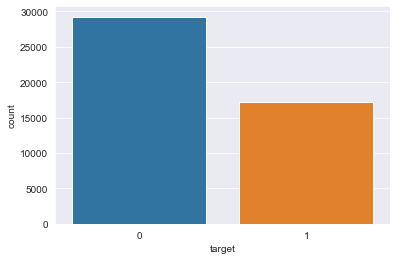

In [119]:
import seaborn as sns

sns.countplot(sub['target'])
sns.set_style("darkgrid")

In [120]:
sub.target.value_counts()

0    29257
1    17147
Name: target, dtype: int64

In [85]:
#sub.to_csv("C:/Users/bella/Desktop/SelfStudy/데이콘/Jobcare_data/sub_2.csv", index=False)

In [123]:
e_train=ex_train.drop('target', axis=1)

In [124]:
e_train=pd.DataFrame(s_x, index=e_train.index, columns=e_train.columns)

In [125]:
ex_train=pd.concat([e_train, ex_train[['target']]], axis=1)

In [126]:
#ex_train.to_csv("C:/Users/bella/Desktop/SelfStudy/데이콘/Jobcare_data/train_1.csv", index=False)

In [128]:
ex_test=pd.DataFrame(mm_test, index=ex_test.index, columns=ex_test.columns)

In [129]:
#ex_test.to_csv("C:/Users/bella/Desktop/SelfStudy/데이콘/Jobcare_data/test_1.csv", index=False)

**0.4150 $\Rightarrow$ 0.4996으로 점수가 0.08460 상승했음.**